In [14]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Load in Farmington Community Hall AQ Monitor data into a pd df
# Note that the second row contains the header names in the csv
year1 = pd.read_csv(r'C:\Users\user\PycharmProjects\CIV1498Project2\0-Raw_data\2019_aq_data.csv', header=[1])
year2 = pd.read_csv(r'C:\Users\user\PycharmProjects\CIV1498Project2\0-Raw_data\2020_aq_data.csv', header=[1])
year3 = pd.read_csv(r'C:\Users\user\PycharmProjects\CIV1498Project2\0-Raw_data\2021_aq_data.csv', header=[1])

year1.tail()

,Date,Time,NOx,SO2,NO,NO2,TRS,O3
8764,Max Date,NaN,6/16/2019 1:00,2/4/2019 16:00,6/16/2019 1:00,1/8/2019 18:00,10/20/2019 22:00,3/21/2019 15:00
8765,Avg,NaN,3.7,0.3,0.8,2.9,0.2,25.2
8766,Num,NaN,8366,8248,8366,8366,8301,8368
8767,Data[%],NaN,96,94,96,96,95,96
8768,STD,NaN,4.6,0.8,2.3,3.3,0.1,11.7


In [36]:
# Drop the last 8 rows that contain data summaries *** note to check if it is always the last 8 rows for other files
year1 = year1[:-8]
year2 = year2[:-8]
year3 = year3[:-8]

In [37]:
# Drop first row (contains units)
year1 = year1.iloc[1:]
year2 = year2.iloc[1:]
year3 = year3.iloc[1:]

In [38]:
# Combine 3 years
FarmingtonCommunityHall_AQ = pd.concat([year1, year2, year3], ignore_index=True)
FarmingtonCommunityHall_AQ.tail(24)

,Date,Time,NOx,SO2,NO,NO2,TRS,O3
26280,12/30/2021,24:00 AM,5.9,0.1,0,5.9,0,20
26281,12/31/2021,1:00 AM,4.9,0.1,0.1,4.9,-0.1,20.9
26282,12/31/2021,2:00 AM,3.8,0,0,3.8,-0.1,24.1
26283,12/31/2021,3:00 AM,3.8,0.1,0.1,3.7,-0.2,21.7
26284,12/31/2021,4:00 AM,4,0,0,4,-0.2,22.1
26285,12/31/2021,5:00 AM,5.7,0,0.2,5.5,-0.1,19.8
26286,12/31/2021,6:00 AM,4.2,0.1,0.1,4.1,-0.1,20.1
26287,12/31/2021,7:00 AM,4,0,0,4,-0.1,20.5
26288,12/31/2021,8:00 AM,5.2,0,0.1,5.1,-0.1,19.3
26289,12/31/2021,9:00 AM,5.6,0.1,0.4,5.1,-0.1,19.5


In [39]:
# Designate data types
FarmingtonCommunityHall_AQ["Date"] = FarmingtonCommunityHall_AQ["Date"].astype(str)
FarmingtonCommunityHall_AQ["Time"] = FarmingtonCommunityHall_AQ["Time"].astype(str)
FarmingtonCommunityHall_AQ[["NOx", "SO2", "NO", "NO2", "TRS", "O3"]] = FarmingtonCommunityHall_AQ[["NOx", "SO2", "NO", "NO2", "TRS", "O3"]].apply(pd.to_numeric)

In [40]:
# Turn the Date and Time columns into a DateTimeIndex
format = '%m/%d/%Y %I:%M %p'
FarmingtonCommunityHall_AQ['Date'] = FarmingtonCommunityHall_AQ[['Date', 'Time']].agg(' '.join, axis =1)
FarmingtonCommunityHall_AQ['Date'] = FarmingtonCommunityHall_AQ['Date'].str.replace('24:00 AM', '12:00 AM')
FarmingtonCommunityHall_AQ['Datetime'] = pd.to_datetime(FarmingtonCommunityHall_AQ['Date'].astype("string"), format=format)
FarmingtonCommunityHall_AQ = FarmingtonCommunityHall_AQ.set_index(pd.DatetimeIndex(FarmingtonCommunityHall_AQ['Datetime']))
FarmingtonCommunityHall_AQ.drop(['Time','Date', 'Datetime'], axis=1, inplace=True)

# View the df
#print(FarmingtonCommunityHall_AQ.info())
FarmingtonCommunityHall_AQ.head(24)

,NOx,SO2,NO,NO2,TRS,O3
Datetime,,,,,,
2018-12-31 00:00:00,0.6,0.4,0.0,0.6,0.6,38.3
2019-01-01 01:00:00,1.2,0.4,0.2,1.0,0.7,37.6
2019-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,0.6,0.2,0.1,0.5,0.1,38.1
2019-01-01 04:00:00,1.7,0.1,0.1,1.6,0.0,36.7
2019-01-01 05:00:00,0.5,0.1,0.1,0.3,0.0,37.9
2019-01-01 06:00:00,0.5,0.3,0.2,0.3,0.1,37.8
2019-01-01 07:00:00,0.6,0.5,0.2,0.4,0.1,37.5
2019-01-01 08:00:00,0.4,0.6,0.1,0.3,0.1,37.2


In [41]:
# Linear interpolation for missing values
FarmingtonCommunityHall_AQ = FarmingtonCommunityHall_AQ.interpolate(method='linear', axis = 0)
FarmingtonCommunityHall_AQ.head()

,NOx,SO2,NO,NO2,TRS,O3
Datetime,,,,,,
2018-12-31 00:00:00,0.6,0.4,0.00,0.60,0.6,38.30
2019-01-01 01:00:00,1.2,0.4,0.20,1.00,0.7,37.60
2019-01-01 02:00:00,0.9,0.3,0.15,0.75,0.4,37.85
2019-01-01 03:00:00,0.6,0.2,0.10,0.50,0.1,38.10
2019-01-01 04:00:00,1.7,0.1,0.10,1.60,0.0,36.70


In [42]:
# Check if there are any missing values
FarmingtonCommunityHall_AQ.isna().sum()

NOx    0
SO2    0
NO     0
NO2    0
TRS    0
O3     0
dtype: int64

In [23]:
# Calculate the mean of all pollutants over a 24 period
FarmingtonCommunityHall_AQ_Daily = FarmingtonCommunityHall_AQ.resample('D').mean()
FarmingtonCommunityHall_AQ_Daily.head()

,NOx,SO2,NO,NO2,TRS,O3
Datetime,,,,,,
2018-12-31,0.600000,0.400000,0.000000,0.600000,0.600000,38.300000
2019-01-01,0.820833,0.333333,0.268750,0.543750,0.183333,37.122917
2019-01-02,0.739583,0.283333,0.229167,0.510417,0.104167,37.287500
2019-01-03,6.056250,0.297917,0.677083,5.362500,0.110417,28.483333
2019-01-04,6.258333,0.687500,0.377083,5.879167,0.172917,24.160417


In [24]:
# Calculate the mean of all pollutants over a 24 period
FarmingtonCommunityHall_AQ_Monthly = FarmingtonCommunityHall_AQ.resample('M').mean()
FarmingtonCommunityHall_AQ_Monthly.head()

,NOx,SO2,NO,NO2,TRS,O3
Datetime,,,,,,
2018-12-31,0.600000,0.400000,0.000000,0.600000,0.600000,38.300000
2019-01-31,5.786626,0.438038,1.044422,4.743817,0.147849,27.624462
2019-02-28,7.262426,0.561086,1.240030,6.024702,0.212054,29.353199
2019-03-31,5.068884,0.409946,0.781788,4.288777,0.174530,34.263306
2019-04-30,2.056181,0.290000,0.337431,1.718194,0.142292,34.923264


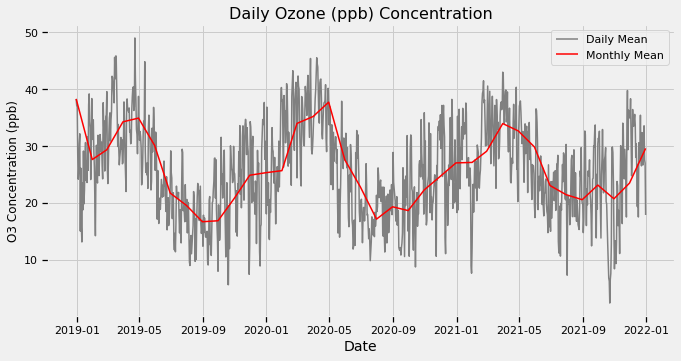

In [25]:
plt.figure(figsize=(10,5))
plt.plot(FarmingtonCommunityHall_AQ_Daily.index, FarmingtonCommunityHall_AQ_Daily['O3'], 'gray', label = 'Daily Mean')
plt.plot(FarmingtonCommunityHall_AQ_Monthly.index, FarmingtonCommunityHall_AQ_Monthly['O3'], 'r', label = 'Monthly Mean')

plt.ylabel('O3 Concentration (ppb)')
plt.xlabel('Date', fontsize=14)

plt.legend()
plt.title('Daily Ozone (ppb) Concentration', fontsize=16)
plt.show()

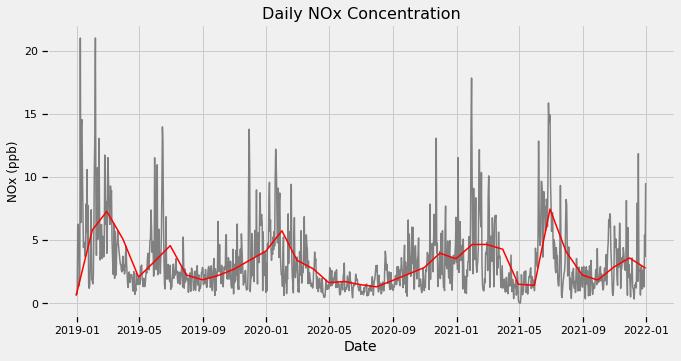

In [26]:
plt.figure(figsize=(10,5))

plt.plot(FarmingtonCommunityHall_AQ_Daily.index, FarmingtonCommunityHall_AQ_Daily['NOx'], 'gray', label = 'Daily Mean')
plt.plot(FarmingtonCommunityHall_AQ_Monthly.index, FarmingtonCommunityHall_AQ_Monthly['NOx'], 'r', label = 'Monthly Mean')

plt.xlabel('Date', fontsize=14)
plt.ylabel('NOx (ppb)')


plt.title('Daily NOx Concentration', fontsize=16)
plt.show()

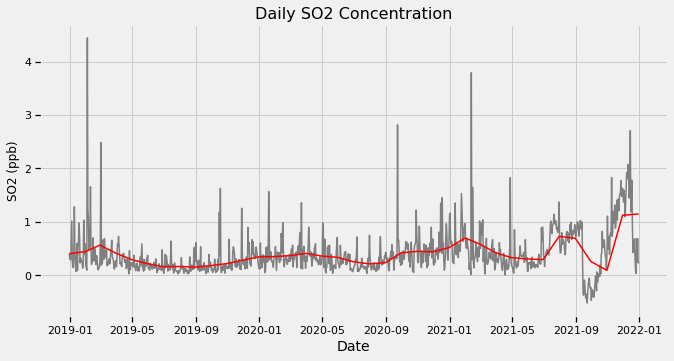

In [27]:
plt.figure(figsize=(10,5))

plt.plot(FarmingtonCommunityHall_AQ_Daily.index, FarmingtonCommunityHall_AQ_Daily['SO2'], 'gray', label = 'Daily Mean')
plt.plot(FarmingtonCommunityHall_AQ_Monthly.index, FarmingtonCommunityHall_AQ_Monthly['SO2'], 'r', label = 'Monthly Mean')

plt.xlabel('Date', fontsize=14)
plt.ylabel('SO2 (ppb)')


plt.title('Daily SO2 Concentration', fontsize=16)
plt.show()

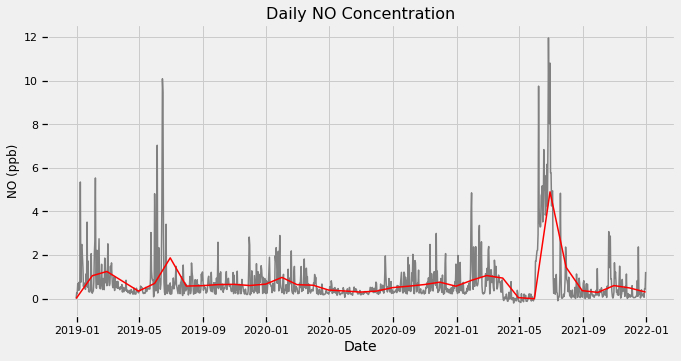

In [28]:
plt.figure(figsize=(10,5))

plt.plot(FarmingtonCommunityHall_AQ_Daily.index, FarmingtonCommunityHall_AQ_Daily['NO'], 'gray', label = 'Daily Mean')
plt.plot(FarmingtonCommunityHall_AQ_Monthly.index, FarmingtonCommunityHall_AQ_Monthly['NO'], 'r', label = 'Monthly Mean')

plt.xlabel('Date', fontsize=14)
plt.ylabel('NO (ppb)')


plt.title('Daily NO Concentration', fontsize=16)
plt.show()

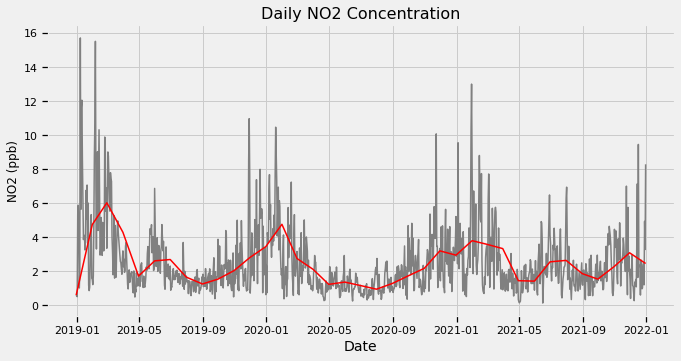

In [29]:
plt.figure(figsize=(10,5))

plt.plot(FarmingtonCommunityHall_AQ_Daily.index, FarmingtonCommunityHall_AQ_Daily['NO2'], 'gray', label = 'Daily Mean')
plt.plot(FarmingtonCommunityHall_AQ_Monthly.index, FarmingtonCommunityHall_AQ_Monthly['NO2'], 'r', label = 'Monthly Mean')


plt.xlabel('Date', fontsize=14)
plt.ylabel('NO2 (ppb)')


plt.title('Daily NO2 Concentration', fontsize=16)
plt.show()

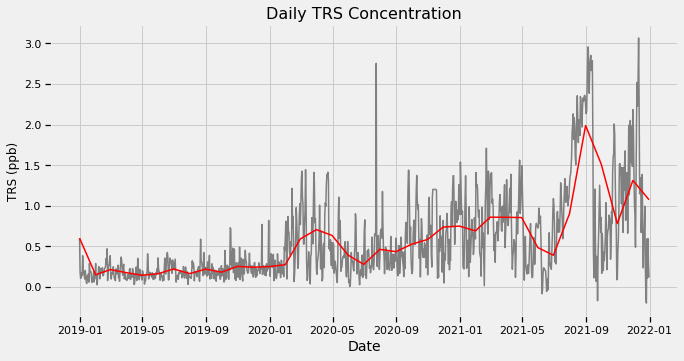

In [30]:
plt.figure(figsize=(10,5))

plt.plot(FarmingtonCommunityHall_AQ_Daily.index, FarmingtonCommunityHall_AQ_Daily['TRS'], 'gray', label = 'Daily Mean')
plt.plot(FarmingtonCommunityHall_AQ_Monthly.index, FarmingtonCommunityHall_AQ_Monthly['TRS'], 'r', label = 'Monthly Mean')


plt.xlabel('Date', fontsize=14)
plt.ylabel('TRS (ppb)')


plt.title('Daily TRS Concentration', fontsize=16)
plt.show()

In [31]:
# Drop O3 from dataframe for boxplot
no_O3 = FarmingtonCommunityHall_AQ.drop(['O3'], axis=1)
O3 = FarmingtonCommunityHall_AQ[['O3']]
O3.head()

,O3
Datetime,
2018-12-31 00:00:00,38.30
2019-01-01 01:00:00,37.60
2019-01-01 02:00:00,37.85
2019-01-01 03:00:00,38.10
2019-01-01 04:00:00,36.70


<AxesSubplot:xlabel='variable', ylabel='value'>

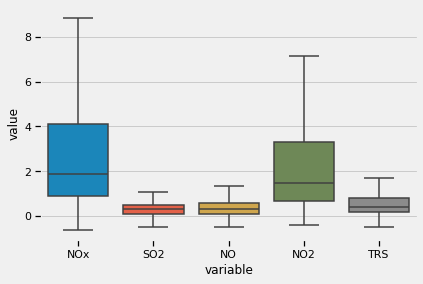

In [32]:
# Distribution of concentrations over 3 year period
sns.boxplot(x="variable", y="value", data=pd.melt(no_O3),
           showfliers = False)

<AxesSubplot:xlabel='variable', ylabel='value'>

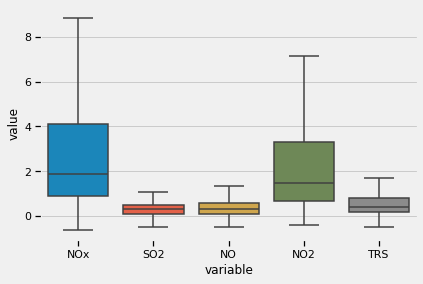

In [33]:
# Distribution for O3 over 3 year period
sns.boxplot(x="variable", y="value", data=pd.melt(no_O3),
           showfliers = False)

In [44]:
FarmingtonCommunityHall_AQ.to_csv('aq_data_cleaned.csv')